<p style="font-size: 4rem; font-weight: bold;color:green">House Price Prediction</p>

### In this project we will predict the price of a house using different machine learning algorithm and finally we will apply deep learngin algorithm to predict the price and compare the accuracy achieved.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

<h1 style="color:blue";>Machine Learning Algorithms</h1>

## 1. Simple Linear Regression

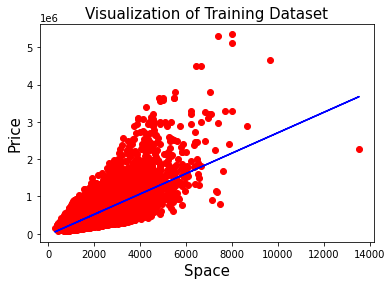

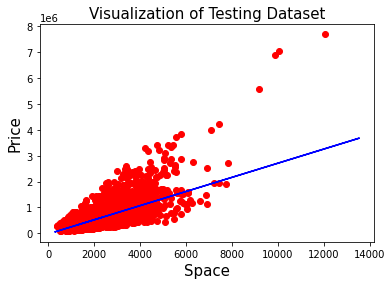

[294046.45440966]


'Accuracy SLR: 50%'

In [2]:
df = pd.read_csv("kc_house_data.csv")

# In simple linear regression there is one independent variable to estimare the dependent
# variable, so we will select one feature as the IV and the price ad DV

space = df['sqft_living']
price = df['price']

# Converting the data into array and reshaping it into 2D
x = np.array(space).reshape(-1,1)
y = np.array(price)

# Split the data into train and test
x_trainS, x_testS, y_trainS, y_testS = train_test_split(x, y, test_size=1/3, random_state=0)

# Fitting simple linear regression to the training set
SLR = LinearRegression()
SLR.fit(x_trainS, y_trainS)

# Predicting the prices
predict = SLR.predict(x_testS)

# Visualizing the training result
plt.scatter(x_trainS, y_trainS, color='red')
plt.plot(x_trainS, SLR.predict(x_trainS), color='blue')
plt.title("Visualization of Training Dataset", fontsize=15)
plt.xlabel("Space", fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

# Visualizing the testing result
plt.scatter(x_testS, y_testS, color='red')
plt.plot(x_trainS, SLR.predict(x_trainS), color='blue')
plt.title("Visualization of Testing Dataset", fontsize=15)
plt.xlabel("Space", fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

print(SLR.predict([[1180]]))
accSLR = SLR.score(x_testS, y_testS)
"Accuracy SLR: {}%".format(int(round(accSLR * 100)))

## 2. Multiple Linear Regression

In [3]:
# Using multiple independent variables to estimate the price
features = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long']
x_feat = df[features]
y_tar = df['price']

x_trainM, x_testM, y_trainM, y_testM= train_test_split(x_feat, y_tar, test_size=0.3, random_state=5)

MLR = LinearRegression()
MLR.fit(x_trainM, y_trainM)

accMLR = MLR.score(x_testM, y_testM)
"Accuracy MLR: {}%".format(int(round(accMLR*100)))

'Accuracy MLR: 100%'

## 3. Ridge Classifier

In [4]:
Rig = Ridge(alpha=0.0001)
Rig.fit(x_trainM, y_trainM)

accRig = Rig.score(x_testM, y_testM)
"Accuracy Ridge: {}".format(int(round(accRig*100)))

C:\Users\Temporary\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.88489e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


'Accuracy Ridge: 100'

## 4. Random Forest 

In [5]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(x_trainM, y_trainM)
accRF = RF.score(x_testM, y_testM)
"RandomForestRegressor Accuracy: {}%" .format(int(round(accRF *100)))

'RandomForestRegressor Accuracy: 100%'

## 5. Elastic Net

In [6]:
from sklearn.linear_model import ElasticNet
EN = ElasticNet()
EN.fit(x_trainM, y_trainM)
accEN = EN.score(x_testM, y_testM)
"ElasticNet Accuracy: {}%" .format(int(round(accEN*100)))

'ElasticNet Accuracy: 100%'

## 6. Decision Tree

In [7]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(x_trainM, y_trainM)
accDTR = DTR.score(x_testM, y_testM)
"DecisionTreeRegressor Accuracy: {}%".format(int(round(accDTR*100)))

'DecisionTreeRegressor Accuracy: 100%'

## 7. KNeighbors

In [8]:
from sklearn.neighbors import KNeighborsRegressor
KNR = KNeighborsRegressor()
KNR.fit(x_trainM, y_trainM)
accKNR = KNR.score(x_testM, y_testM)
("KNeighborsRegressor Accuracy: {}%".format(int(round(accKNR*100))))

'KNeighborsRegressor Accuracy: 100%'

## 8. Gradient Boosting

In [9]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()
GBR.fit(x_trainM, y_trainM)
accGBR = GBR.score(x_testM, y_testM)
"GradientBoostingRegressor Accuracy: {}%".format(int(round(accGBR*100)))

'GradientBoostingRegressor Accuracy: 100%'

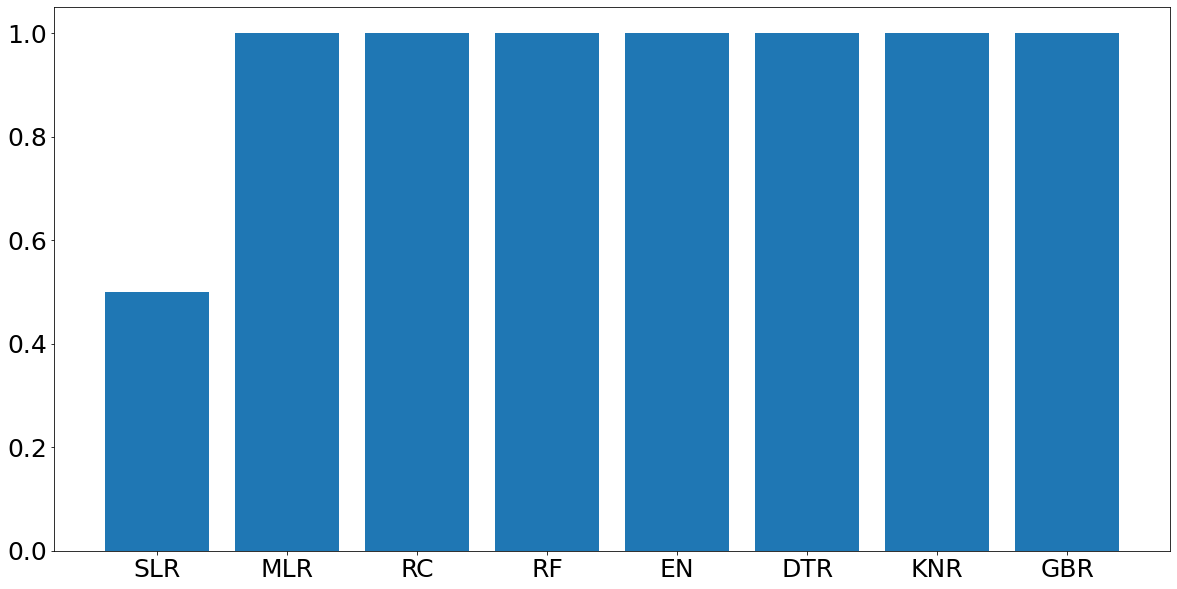

In [10]:
algorithms = ['SLR', 'MLR','RC','RF','EN','DTR','KNR','GBR']
acc = [accSLR, accMLR, accRig, accRF, accEN, accDTR, accKNR, accGBR]
plt.figure(figsize=(20,10))
plt.bar(algorithms, acc)
plt.xticks(fontsize=25);
plt.yticks(fontsize=25);

<h1 style="color:red"> Let's first explore a little</h1>

In [11]:
df.isnull().sum()
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


<Figure size 864x576 with 0 Axes>

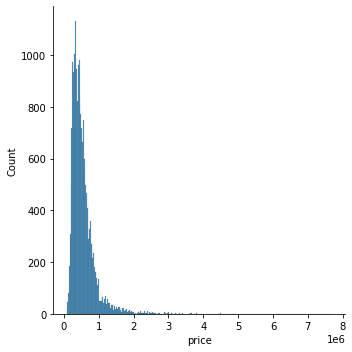

In [12]:
plt.figure(figsize=(12,8))
sns.displot(df['price'])

C:\Users\Temporary\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

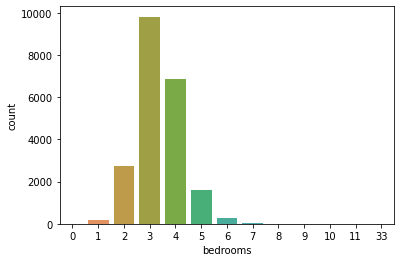

In [13]:
sns.countplot(df['bedrooms'])

In [14]:
# Scattering plot function
def Plot(x, y, data, *args, **kwargs):
    plt.figure(figsize=(12,8))
    if True in args:
        sns.boxplot(x=x, y=y, data=df)
    else:
        sns.scatterplot(x=x, y=y, data=data,**kwargs)
    plt.xlabel(x, fontsize=15)
    plt.ylabel(y, fontsize=15)
    plt.title(f"{x} vs {y}", fontsize=15)

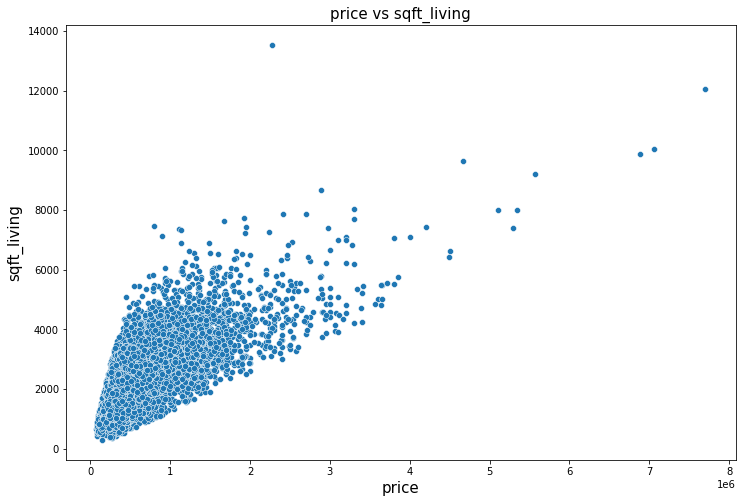

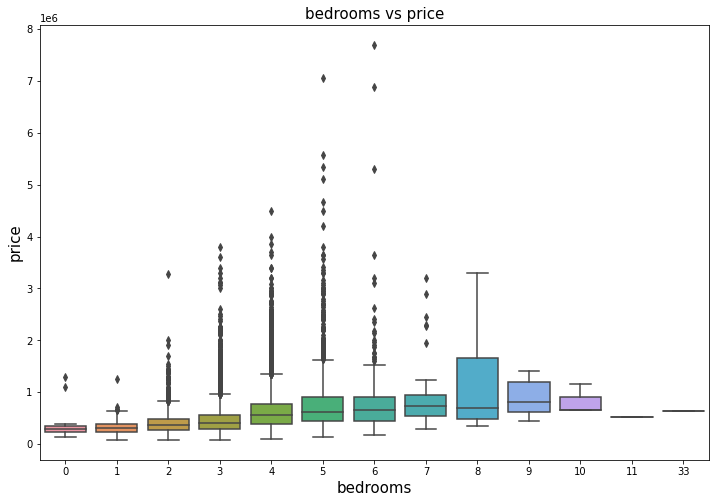

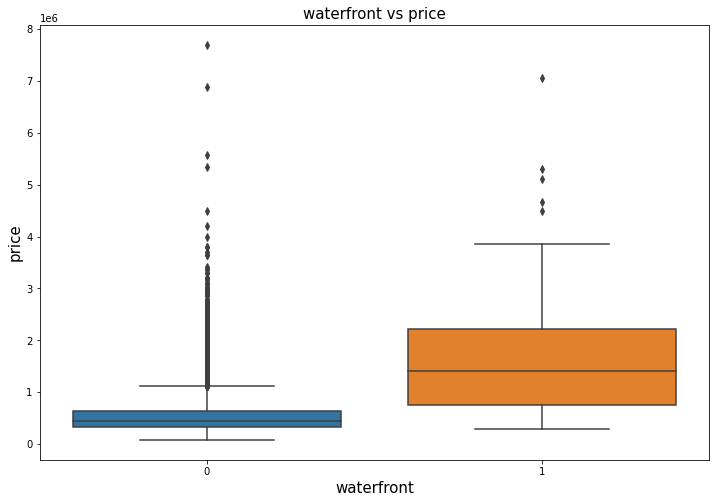

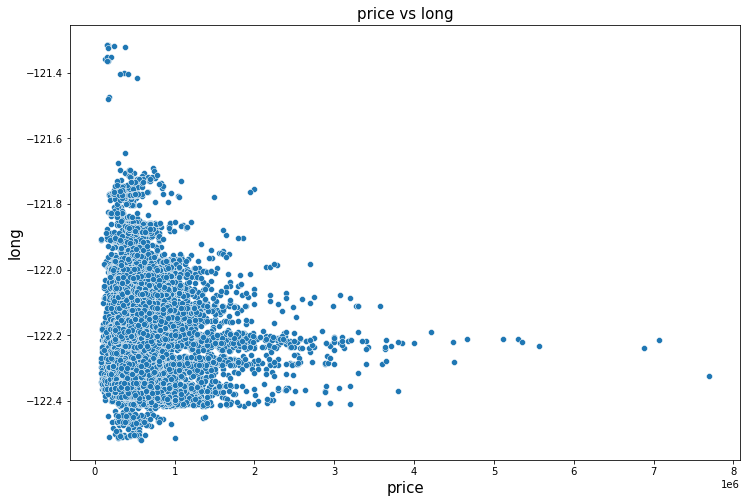

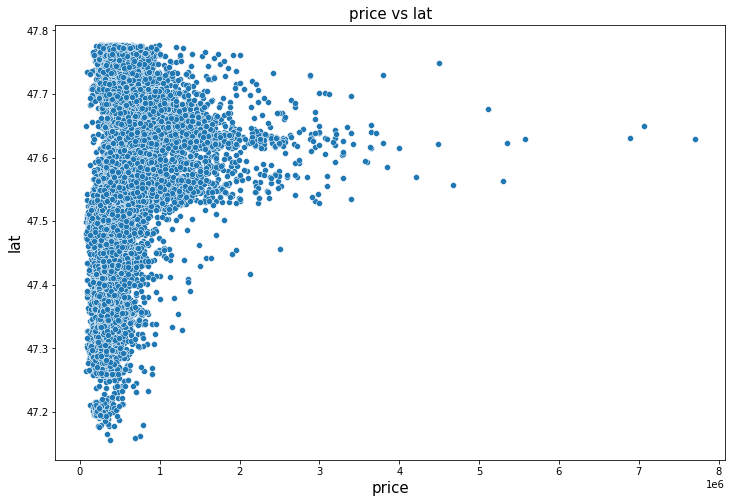

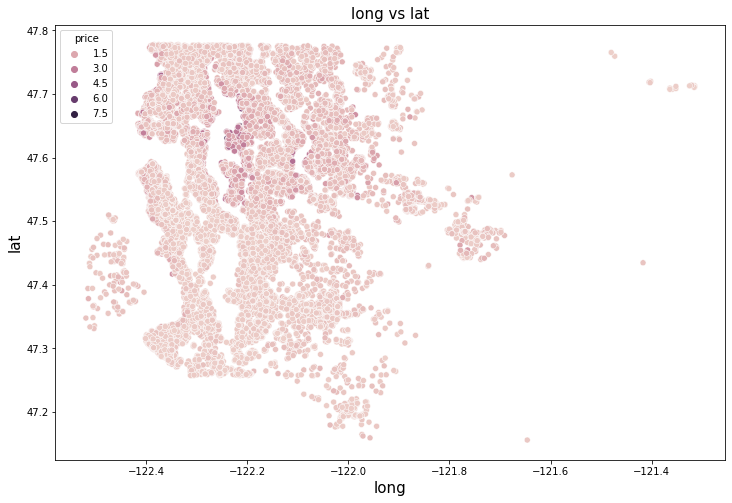

In [15]:
Plot('price', 'sqft_living', df)
Plot('bedrooms', 'price', df, True)
Plot('waterfront', 'price', df, True)
Plot('price', 'long', df)
Plot('price', 'lat', df)
Plot('long', 'lat', df, hue='price')

<AxesSubplot:xlabel='long', ylabel='lat'>

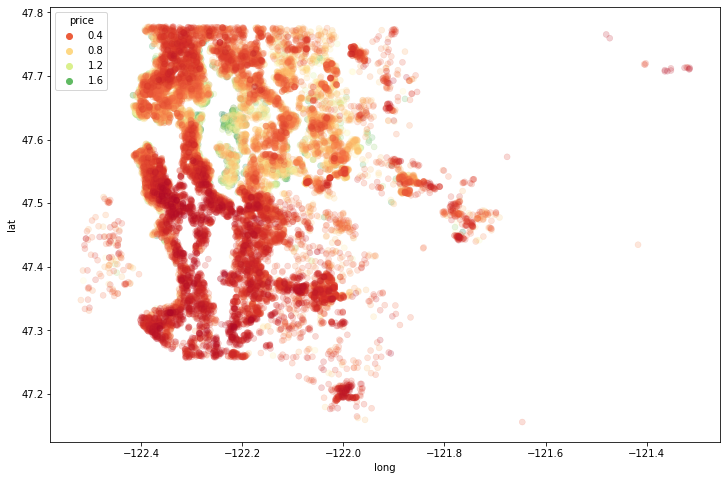

In [16]:
df.sort_values('price', ascending=False).head(20)
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=non_top_1_perc,hue='price',
                palette='RdYlGn',edgecolor=None,alpha=0.2)

<h1 style="color:blue">ANN Algorithm</h1>


In [22]:
# Preparing the dataset
df2 = pd.read_csv("kc_house_data.csv")

df2['date'] = pd.to_datetime(df2['date'])
df2['month'] = df2['date'].apply(lambda date:date.month)
df2['year'] = df2['date'].apply(lambda date: date.year)
# Plot('year', 'price', df2, True)
# Plot('month', 'price', df2, True)

df2 = df2.drop('date', axis=1)
df2 = df2.drop('zipcode', axis=1)
x_new = df2.drop('price', axis=1)
y_new= df2['price'];

In [23]:
from sklearn.preprocessing import MinMaxScaler
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.3,
                                                   random_state=101)
scalar = MinMaxScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

### Model Building

In [36]:
from sklearn import metrics

def print_evaluate(true, predicted, train=True):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    if train:
        print("========Training Result=======")
        print('MAE: ', mae)
        print('MSE: ', mse)
        print('RMSE: ', rmse)
        print('R2 Square: ', r2_square)
    elif not train:
        print("=========Testing Result=======")
        print('MAE: ', mae)
        print('MSE: ', mse)
        print('RMSE: ', rmse)
        print('R2 Square: ', r2_square)

model = Sequential()

model.add(Dense(x_train.shape[1],activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer=Adam(0.001), loss='mse')        

<h1 style="color:brown">==================Testing ANN model=================</h1>


result = model.fit(x_train, y_train.values,
              validation_data=(x_test,y_test.values),
              batch_size=128,
              epochs=500)

<h1 style="color:brown">==================================================</h1>

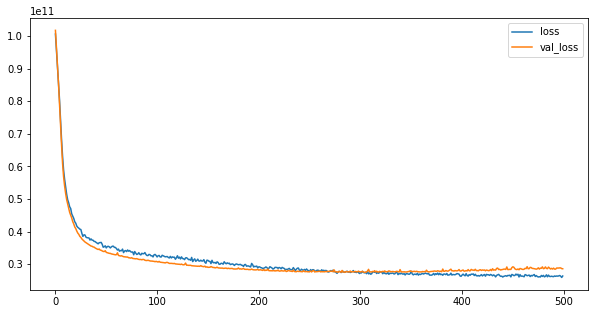

In [46]:
plt.figure(figsize=(10,5))
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label='val_loss')
plt.legend()

# Or it can also plotted using the following way
# lossANN = pd.DataFrame(result.history)
# lossANN.plot()

### Evaluation Metrics

In [47]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print_evaluate(y_train, y_train_pred, train=True)
print_evaluate(y_test, y_test_pred, train=False)

========Training Result=======
MAE:  98079.88391938702
MSE:  24517402162.439224
RMSE:  156580.33772616286
R2 Square:  0.8148495800304112
=========Testing Result=======
MAE:  100206.82979136142
MSE:  28556999357.949142
RMSE:  168988.16336640014
R2 Square:  0.7964211773971898


plt.subplot(2, 2, 1)
df.groupby('month').mean()['price'].plot()
plt.subplot(2, 2, 2)
df.groupby('year').mean()['price'].plot()

<h1 style="color:blue">Deep Learning Algorithm</h1>

In [107]:
# Read the data, analyze and try to visualize somehow
df3 = pd.read_csv('kc_house_data.csv')

df3.shape
df3.describe().transpose()
# Check for Null values in the data
df3.isnull().sum()
# sns.displot(df3['price'])
df3.sort_values('price',ascending=False).head(20) # Max price 7700000

# Drop some unnecessary columns and divide the date
df3 = df3.drop('id', axis=1) # drop the id column
df3['date'] = pd.to_datetime(df3['date'])
df3['month'] = df3['date'].apply(lambda date:date.month)
df3['year'] = df3['date'].apply(lambda date:date.year)
df3 = df3.drop('date',axis=1)
df3 = df3.drop('zipcode', axis=1)

# Assigning all IV to x and DL(price) to y
xDL = df3.iloc[:,df3.columns != 'price']
yDL = df3.iloc[:,df3.columns == 'price']

x_tr, x_te, y_tr, y_te = train_test_split(xDL, yDL, test_size=0.3, 
                                          random_state=42)
x_tr = scalar.fit_transform(x_tr)
x_te = scalar.transform(x_te)

### Model Building

In [105]:
modelDL = Sequential()
modelDL.add(Dense(19, activation='relu'))  # x_tr.shape[1]=19
modelDL.add(Dense(19, activation='relu'))
modelDL.add(Dense(19, activation='relu'))
modelDL.add(Dense(19, activation='relu'))
modelDL.add(Dense(1))

modelDL.compile(optimizer='adam', loss='mse')

<h1 style="color:brown">-----------------------Testing Deep Learning model-------------------------</h1>

In [118]:
resultDL = modelDL.fit(x=x_tr, y=y_tr.values, 
                       validation_data=(x_te, y_te.values),
                      batch_size=128, epochs=300)

Epoch 1/300
119/119 [==============================] - 0s 3ms/step - loss: 33940733952.0000 - val_loss: 39226863616.0000
Epoch 2/300
119/119 [==============================] - 0s 3ms/step - loss: 33838139392.0000 - val_loss: 39087763456.0000
Epoch 3/300
119/119 [==============================] - 0s 3ms/step - loss: 33773850624.0000 - val_loss: 39039995904.0000
Epoch 4/300
119/119 [==============================] - 0s 3ms/step - loss: 33689460736.0000 - val_loss: 38957387776.0000
Epoch 5/300
119/119 [==============================] - 0s 3ms/step - loss: 33596229632.0000 - val_loss: 38876323840.0000
Epoch 6/300
119/119 [==============================] - 0s 3ms/step - loss: 33498445824.0000 - val_loss: 38959915008.0000
Epoch 7/300
119/119 [==============================] - 0s 3ms/step - loss: 33490126848.0000 - val_loss: 38865276928.0000
Epoch 8/300
119/119 [==============================] - 0s 3ms/step - loss: 33361047552.0000 - val_loss: 38735618048.0000
Epoch 9/300
119/119 [===========

119/119 [==============================] - 0s 3ms/step - loss: 30363869184.0000 - val_loss: 36707180544.0000
Epoch 69/300
119/119 [==============================] - 0s 3ms/step - loss: 30364389376.0000 - val_loss: 36568121344.0000
Epoch 70/300
119/119 [==============================] - 0s 3ms/step - loss: 30333853696.0000 - val_loss: 36529709056.0000
Epoch 71/300
119/119 [==============================] - 0s 3ms/step - loss: 30288101376.0000 - val_loss: 36542984192.0000
Epoch 72/300
119/119 [==============================] - 0s 3ms/step - loss: 30264590336.0000 - val_loss: 36463398912.0000
Epoch 73/300
119/119 [==============================] - 0s 3ms/step - loss: 30234867712.0000 - val_loss: 36623310848.0000
Epoch 74/300
119/119 [==============================] - 0s 3ms/step - loss: 30210443264.0000 - val_loss: 36544835584.0000
Epoch 75/300
119/119 [==============================] - 0s 3ms/step - loss: 30171742208.0000 - val_loss: 36552015872.0000
Epoch 76/300
119/119 [===============

Epoch 135/300
119/119 [==============================] - 0s 3ms/step - loss: 28952651776.0000 - val_loss: 35299532800.0000
Epoch 136/300
119/119 [==============================] - 0s 3ms/step - loss: 28925855744.0000 - val_loss: 35278020608.0000
Epoch 137/300
119/119 [==============================] - 0s 3ms/step - loss: 28897730560.0000 - val_loss: 35306053632.0000
Epoch 138/300
119/119 [==============================] - 0s 4ms/step - loss: 28910579712.0000 - val_loss: 35237756928.0000
Epoch 139/300
119/119 [==============================] - 1s 4ms/step - loss: 28863524864.0000 - val_loss: 35223687168.0000
Epoch 140/300
119/119 [==============================] - 0s 4ms/step - loss: 28880877568.0000 - val_loss: 35203571712.0000
Epoch 141/300
119/119 [==============================] - 0s 3ms/step - loss: 28856035328.0000 - val_loss: 35176460288.0000
Epoch 142/300
119/119 [==============================] - 1s 5ms/step - loss: 28834936832.0000 - val_loss: 35167498240.0000
Epoch 143/300
11

119/119 [==============================] - 0s 3ms/step - loss: 28159680512.0000 - val_loss: 34366455808.0000
Epoch 202/300
119/119 [==============================] - 0s 2ms/step - loss: 28191907840.0000 - val_loss: 34277691392.0000
Epoch 203/300
119/119 [==============================] - 0s 2ms/step - loss: 28171761664.0000 - val_loss: 34195902464.0000
Epoch 204/300
119/119 [==============================] - 0s 2ms/step - loss: 28140513280.0000 - val_loss: 34204104704.0000
Epoch 205/300
119/119 [==============================] - 0s 2ms/step - loss: 28150366208.0000 - val_loss: 34209216512.0000
Epoch 206/300
119/119 [==============================] - 0s 2ms/step - loss: 28149743616.0000 - val_loss: 34162685952.0000
Epoch 207/300
119/119 [==============================] - 0s 2ms/step - loss: 28140851200.0000 - val_loss: 34194178048.0000
Epoch 208/300
119/119 [==============================] - 0s 2ms/step - loss: 28123486208.0000 - val_loss: 34136068096.0000
Epoch 209/300
119/119 [=======

119/119 [==============================] - 0s 4ms/step - loss: 27477487616.0000 - val_loss: 33386786816.0000
Epoch 268/300
119/119 [==============================] - 0s 3ms/step - loss: 27504783360.0000 - val_loss: 33347690496.0000
Epoch 269/300
119/119 [==============================] - 0s 3ms/step - loss: 27457761280.0000 - val_loss: 33317056512.0000
Epoch 270/300
119/119 [==============================] - 0s 4ms/step - loss: 27470739456.0000 - val_loss: 33336291328.0000
Epoch 271/300
119/119 [==============================] - 0s 3ms/step - loss: 27466649600.0000 - val_loss: 33293139968.0000
Epoch 272/300
119/119 [==============================] - 0s 3ms/step - loss: 27441152000.0000 - val_loss: 33306097664.0000
Epoch 273/300
119/119 [==============================] - 0s 3ms/step - loss: 27417954304.0000 - val_loss: 33272489984.0000
Epoch 274/300
119/119 [==============================] - 0s 3ms/step - loss: 27416772608.0000 - val_loss: 33212041216.0000
Epoch 275/300
119/119 [=======

<h1 style="color:brown">---------------------------------------------------------------------------------------/h1>

<AxesSubplot:>

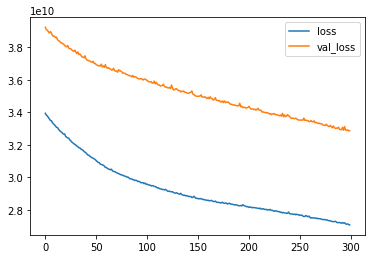

In [145]:
losses = pd.DataFrame(resultDL.history)
losses.plot()

### Evaluation Metrics

========Training Result=======
MAE:  103557.20314772126
MSE:  27062981489.24433
RMSE:  164508.30218941637
R2 Square:  0.7928524398297759
=========Testing Result=======
MAE:  107941.68891333474
MSE:  32873791875.342873
RMSE:  181311.3120446236
R2 Square:  0.7722893837518872


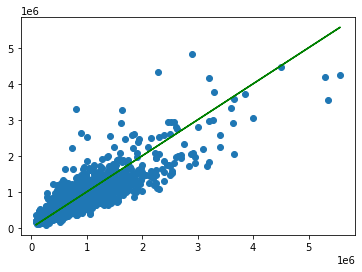

In [165]:
trainPrediction = modelDL.predict(x_tr)
testPrediction = modelDL.predict(x_te)

print_evaluate(y_tr, trainPrediction, train=True)
print_evaluate(y_te, testPrediction, train=False)

plt.scatter(y_te.values, testPrediction)
plt.plot(y_te.values, y_te.values, 'g')
plt.show()

In [174]:
# plt.scatter(x_te, y_te.values, 'g')
print(x_te.shape)
print(y_te.shape)

(6484, 19)
(6484, 1)


C:\Users\Temporary\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

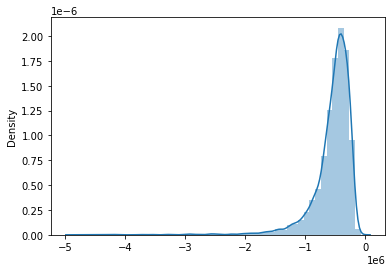

In [170]:
errors = y_te.values.shape - testPrediction
sns.distplot(errors)

<h1 style="color:green">-->-->-->-->-->-->-->-->-->-->-->-->The End-->-->-->-->-->-->-->-->-->-->-->--></h1>